In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_pareto_for_generation(json_filename, target_generation="100", pdf_filename="pareto_fronts_gen150.pdf"):
    """
    Read the JSON file, extract solutions at a specific generation for each algorithm,
    plot each algorithm's 3D Pareto front in its own subplot with red dots, and save
    to a single PDF file. All subplots share the same X, Y, and Z ranges.
    """
    # Load data from JSON
    with open(json_filename, 'r') as f:
        data = json.load(f)

    # Prepare containers to collect all points across algorithms for generation 150
    all_x = []
    all_y = []
    all_z = []

    # Dictionary to store generation 150 solutions for each algorithm
    gen150_data = {}

    # Extract solutions for generation 150 from each algorithm
    for algo_name, generations in data.items():
        # Check if the target generation exists for this algorithm
        if target_generation in generations:
            solutions = generations[target_generation]
            # Convert to numpy array for easier processing
            arr = np.array(solutions)
            gen150_data[algo_name] = arr

            # If there are solutions, extend the global lists
            if arr.size > 0:
                all_x.extend(arr[:, 0])
                all_y.extend(arr[:, 1])
                all_z.extend(arr[:, 2])
        else:
            # If the target generation is missing, store empty array
            gen150_data[algo_name] = np.empty((0, 3))

    # Determine the global min and max for each dimension
    # (Assumes at least one solution exists across all algorithms)
    global_x_min, global_x_max = min(all_x), max(all_x)
    global_y_min, global_y_max = min(all_y), max(all_y)
    global_z_min, global_z_max = min(all_z), max(all_z)

    # Count how many algorithms we have
    num_algos = len(gen150_data)
    
    # Decide subplot grid shape (example: up to 2 columns)
    cols = min(num_algos, 2)
    rows = int(np.ceil(num_algos / float(cols)))

    # Create a figure
    fig = plt.figure(figsize=(5 * cols, 5 * rows))
    
    # For each algorithm, create a 3D subplot
    for idx, (algo_name, arr) in enumerate(gen150_data.items()):
        ax = fig.add_subplot(rows, cols, idx + 1, projection='3d')

        if arr.size > 0:
            x = arr[:, 0]
            y = arr[:, 1]
            z = arr[:, 2]
            # Scatter with red dots
            ax.scatter(x, y, z, color='red', s=40, alpha=0.7)

        # Set the global ranges
        ax.set_xlim(global_x_min, global_x_max)
        ax.set_ylim(global_y_min, global_y_max)
        ax.set_zlim(global_z_min, global_z_max)

        ax.set_title(f"{algo_name} (Gen {target_generation})")
        ax.set_xlabel("Energy Comsumption")
        ax.set_ylabel("Vehicle Fairness")
        ax.set_zlabel("Customer Fairness")

    plt.tight_layout()
    
    # Save the figure to a PDF and then show
    # plt.savefig(pdf_filename, format="pdf")
    plt.show()
    plt.close()  # Close the figure to free memory

# Usage example:
# plot_3d_pareto_for_generation("path_to_your_file.json")

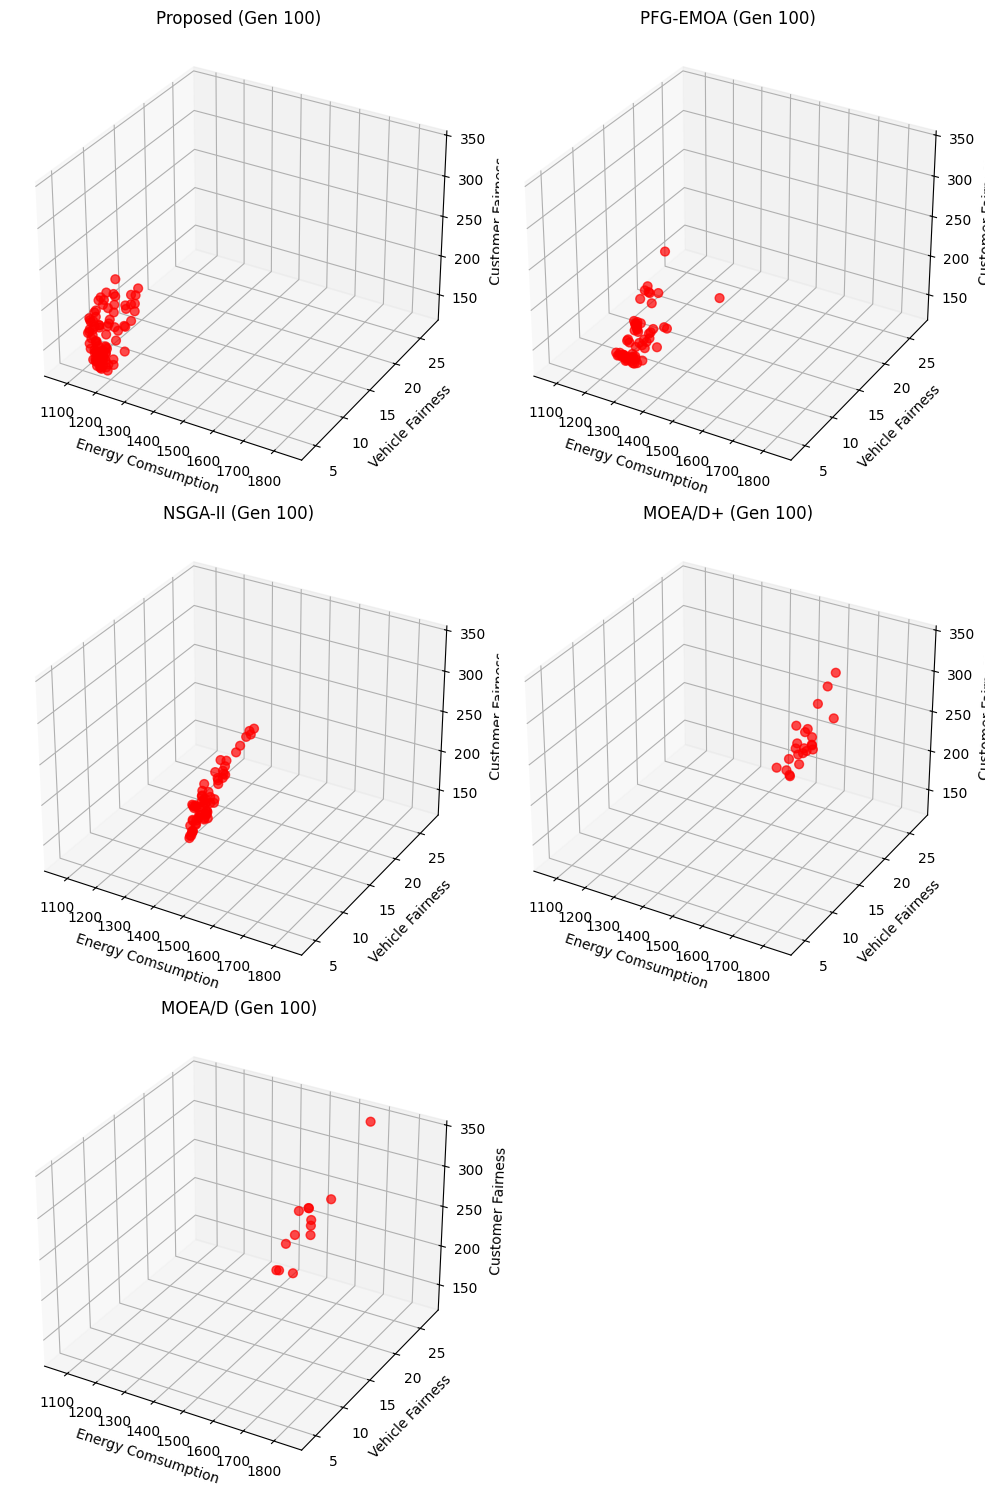

In [5]:
json_file = "F:\setup files\downloads\Result2\LC1_2_1_0.json"
    
# Call the function to plot
plot_3d_pareto_for_generation(json_file)
